In [1]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from copulae1 import *
from KDEs import *
from toolbox import *
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('../processed_data/btc_future_crix.csv')
data.head()

ecdf_brr = ECDF(data.return_brr)
ecdf_btc = ECDF(data.return_btc)

u = ecdf_brr(data.return_brr)
v = ecdf_btc(data.return_btc)

kde_brr = KDE(data.return_brr, "Gaussian")
kde_btc = KDE(data.return_btc, "Gaussian")

In [2]:
# Gaussian, t_Copula, Clayton, Frank, Gumbel, Plackett, Gaussian mix Indep
C1 =                 Gaussian(rho=0.9,       Law_RS=kde_brr, Law_RF=kde_btc) # fix the maringals!
C2 =                 t_Copula(rho=0.1, nu=4, Law_RS=kde_brr, Law_RF=kde_btc) 
C3 =                  Clayton(theta=0.1,     Law_RS=kde_brr, Law_RF=kde_btc)
C4 =                    Frank(theta=0.1,     Law_RS=kde_brr, Law_RF=kde_btc)
C5 =                   Gumbel(theta=3,       Law_RS=kde_brr, Law_RF=kde_btc)
C6 =                 Plackett(theta=10,      Law_RS=kde_brr, Law_RF=kde_btc)
C7 = Gaussian_Mix_Independent(0.9,0.7,Law_RS=kde_brr, Law_RF=kde_btc)
Copulae_names = ['Gaussian', 't_Copula', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep']
Copulae_arr   = [C1,C2,C3,C4,C5,C6,C7]
Copulae = dict(zip(Copulae_names, Copulae_arr))

C2c = t_Copula(rho=0.1, nu=4,  Law_RS=kde_brr, Law_RF=kde_btc) 
C2c.canonical_calibrate(u,v,4)

Optimization terminated successfully.
         Current function value: -0.502971
         Iterations: 175
         Function evaluations: 330


array([0.79907292, 4.        ])

In [3]:
for C_name in Copulae:
    Copulae[C_name].canonical_calibrate(u,v)
    print(C_name,'is done.\n')

Optimization terminated successfully.
         Current function value: -0.436606
         Iterations: 33
         Function evaluations: 67
Gaussian is done.

Optimization terminated successfully.
         Current function value: -0.515522
         Iterations: 198
         Function evaluations: 383
t_Copula is done.

Optimization terminated successfully.
         Current function value: -0.394737
         Iterations: 43
         Function evaluations: 92
Clayton is done.

Optimization terminated successfully.
         Current function value: -0.413272
         Iterations: 47
         Function evaluations: 102
Frank is done.

Optimization terminated successfully.
         Current function value: -0.456857
         Iterations: 36
         Function evaluations: 78
Gumbel is done.

Optimization terminated successfully.
         Current function value: -0.482641
         Iterations: 42
         Function evaluations: 92
Plackett is done.

Optimization terminated successfully.
         Current 

In [4]:
# parameters
print("Parameters  :" ,
      "\nGaussian    :" , C1.rho,
      "\nt           :" , C2.rho, C2.nu, 
      "\nt(nu capped):" , C2c.rho,C2c.nu,
      "\nClayton     :" , C3.theta,
      "\nFrank       :" , C4.theta,
      "\nGumbel      :" , C5.theta, 
      "\nPlackett    :" , C6.theta,      
      "\nMixture     :" , C7.rho, C7.p)

Parameters  : 
Gaussian    : 0.7682137557864189 
t           : 0.7758135540378888 2.0000000000019984 
t(nu capped): 0.7990729223291435 4.000000000000071 
Clayton     : 1.9376202894747336 
Frank       : 7.1803941336274395 
Gumbel      : 2.262103709019719 
Plackett    : 21.73745587375015 
Mixture     : 0.9257098982437446 0.730537802300923


In [5]:
# Likelihood
print("Log Likelihood ",
      "\nGaussian    :", C1.l_fn(C1.rho, u,v),
      "\nt           :", C2.l_fn(C2.rho, C2.nu, u,v),
      "\nt(nu capped):", C2c.l_fn(C2c.rho, C2c.nu, u,v),
      "\nClayton     :", C3.l_fn(C3.theta, u,v),
      "\nFrank       :", C4.l_fn(C4.theta, u,v),
      "\nGumbel      :", C5.l_fn(C5.theta, u,v), 
      "\nPlackett    :", C6.l_fn(C6.theta, u,v), 
      "\nMixture     :", C7.l_fn(C7.rho, C7.p,u,v))

Log Likelihood  
Gaussian    : 0.4445017729067782 
t           : 0.5175515286733854 
t(nu capped): 0.507278499083893 
Clayton     : 0.3947361089938826 
Frank       : 0.4132697635994375 
Gumbel      : 0.45685655378875256 
Plackett    : 0.48264136453947476 
Mixture     : 0.5090127119623474


In [47]:
C = t_Copula(C2.rho, C2.nu, kde_brr, kde_btc)
h = 1
s = C.sample(100000)
rh1 = s[:,0] - h*s[:,1]

In [148]:
C = Gaussian(C1.rho*1, kde_brr, kde_btc)
h = 1
s = C.sample(1000000)
rh = s[:,0] - h*s[:,1]

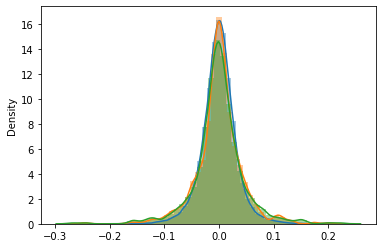

In [88]:
sns.distplot(rh)
sns.distplot(s[:,0])
sns.distplot(s[:,1])

In [89]:
h = 1
s = C1.sample(100000)
rh1 = s[:,0] - h*s[:,1]

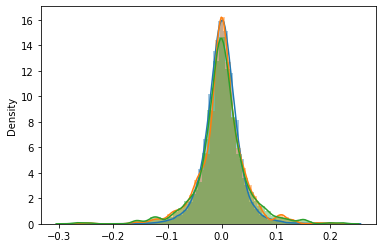

In [90]:
sns.distplot(rh1)
sns.distplot(C1.rs)
sns.distplot(C1.rf)

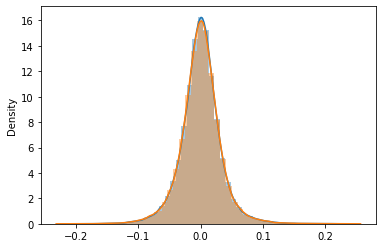

In [91]:
sns.distplot(rh)
sns.distplot(rh1)

In [94]:
ecdf = ECDF(rh)

In [207]:
def ERM_estimate_trapezoidal(k, rh):
    rh = np.sort(rh)
    s  = ECDF(rh)(rh)
    d  = s[1:] - s[:-1] 
    toint = ERM_weight(k,s)*rh
    return -np.sum((toint[:-1] + toint[1:])*d)/2

def ES(q, rh):
    b = np.quantile(rh,q)
    return -np.mean(rh[rh<=q])

def wrapper(rs, rf, h, risk_measure):
    rh = rs - h*rf
    return risk_measure(rh)

def optimize_h(C, k_arr, q_arr):
    sample = C.sample(1000000)
    rs = sample[:,0]
    rf = sample[:,1]
    best_h = []
    
    for k in k_arr:
        fn = lambda h: wrapper(rs,rf,h,partial(ERM_estimate_trapezoidal,k))
        best_h.append(scipy.optimize.fmin(fn,1)[0])
        
    for q in q_arr:
        fn = lambda h: wrapper(rs,rf,h,partial(ES,q))
        best_h.append(scipy.optimize.fmin(fn,1)[0])
    return best_h

In [208]:
optimize_h(C2, [10,20], [0.01,0.1])

Optimization terminated successfully.
         Current function value: 0.058748
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.081974
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.016499
         Iterations: 14
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: 0.001819
         Iterations: 14
         Function evaluations: 28


[0.7359374999999998,
 0.7222656249999998,
 0.6999999999999997,
 0.6445312499999997]

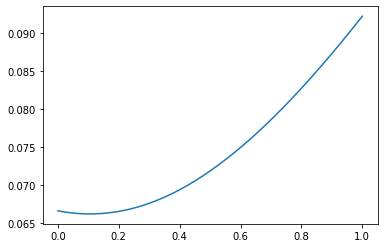

In [18]:
sample = C2.sample(100000)
rs = sample[:,0]
rf = sample[:,1]
best_h = []
    
fn = lambda h: wrapper(rs,rf,h,partial(ERM_estimate_trapezoidal,10))

h_arr = np.linspace(0,1,1000)
result = []
for h in h_arr:
    result.append(fn(h))
plt.plot(h_arr, result)

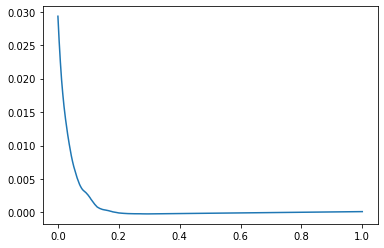

In [19]:
sample = C2.sample(100000)
rs = sample[:,0]
rf = sample[:,1]
best_h = []
    
fn = lambda q: wrapper(rs,rf,h,partial(ES,q))

h_arr = np.linspace(0,1,1000)
result = []
for h in h_arr:
    result.append(fn(h))
plt.plot(h_arr, result)

In [3]:
from riskmeasures import *

In [17]:
optimize_h(C1, [10,20], [0.01,0.05,0.1])

Optimization terminated successfully.
         Current function value: 0.030515
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.040137
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.007941
         Iterations: 14
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000848
         Iterations: 13
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.000025
         Iterations: 15
         Function evaluations: 30


[0.8124999999999998,
 0.82119140625,
 0.7632812499999997,
 0.7816406249999996,
 0.6579101562499996]

In [141]:
def run(train):
    print(train.head())
    print(train.tail())
    rs_data = train.iloc[:,2]
    rf_data = train.iloc[:,3]

    kde_brr = KDE(rs_data, "Gaussian")
    kde_btc = KDE(rf_data, "Gaussian")

    kde_brr = KDE(rs_data, "Gaussian", kde_brr.h_brot*2) # get a smoother KDE
    kde_btc = KDE(rf_data, "Gaussian", kde_btc.h_brot*2) 

    u = ECDF(rs_data)(rs_data)
    v = ECDF(rf_data)(rf_data)
    
    # Gaussian, t_Copula, Clayton, Frank, Gumbel, Plackett, Gaussian mix Indep
    C1 =                 Gaussian(rho=0.9,       Law_RS=kde_brr, Law_RF=kde_btc) # fix the maringals!
    C2 =                 t_Copula(rho=0.1, nu=4, Law_RS=kde_brr, Law_RF=kde_btc) 
    C2c =                t_Copula(rho=0.1, nu=4, Law_RS=kde_brr, Law_RF=kde_btc) 
    C3 =                  Clayton(theta=0.1,     Law_RS=kde_brr, Law_RF=kde_btc)
    C4 =                    Frank(theta=0.1,     Law_RS=kde_brr, Law_RF=kde_btc)
    C5 =                   Gumbel(theta=3,       Law_RS=kde_brr, Law_RF=kde_btc)
    C6 =                 Plackett(theta=10,      Law_RS=kde_brr, Law_RF=kde_btc)
    C7 = Gaussian_Mix_Independent(0.9,0.7,Law_RS=kde_brr, Law_RF=kde_btc)
    Copulae_names = ['Gaussian', 't_Copula','t_Copula Capped', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep']
    Copulae_arr   = [C1,C2,C2c,C3,C4,C5,C6,C7]
    Copulae = dict(zip(Copulae_names, Copulae_arr))
    
    # Calibrate
    C1.canonical_calibrate(u,v)
    C2.canonical_calibrate(u,v)
    C2c.canonical_calibrate(u,v,4)
    C3.canonical_calibrate(u,v)
    C4.canonical_calibrate(u,v)
    C5.canonical_calibrate(u,v)
    C6.canonical_calibrate(u,v)
    C7.canonical_calibrate(u,v)

    paras = [C1.rho, 
             (C2.rho, C2.nu),
             (C2c.rho, C2c.nu),
             C3.theta,
             C4.theta,
             C5.theta,
             C6.theta,
             (C7.rho, C7.p)]
    
    paras = dict(zip(Copulae_names, paras))
    
    # Likelihood
    ln = [C1.l_fn(C1.rho, u,v),
          C2.l_fn(C2.rho, C2.nu, u,v),
          C2c.l_fn(C2c.rho, C2c.nu, u,v),
          C3.l_fn(C3.theta, u,v),
          C4.l_fn(C4.theta, u,v),
          C5.l_fn(C5.theta, u,v), 
          C6.l_fn(C6.theta, u,v), 
          C7.l_fn(C7.rho, C7.p,u,v)]
    
    ln = dict(zip(Copulae_names, ln))
    
    # best h
    best_h = [optimize_h(C1, [10,20], [0.01,0.05,0.1]),
              optimize_h(C2, [10,20], [0.01,0.05,0.1]), 
              optimize_h(C2c,[10,20], [0.01,0.05,0.1]), 
              optimize_h(C3, [10,20], [0.01,0.05,0.1]),
              optimize_h(C4, [10,20], [0.01,0.05,0.1]),
              optimize_h(C5, [10,20], [0.01,0.05,0.1]),
              optimize_h(C6, [10,20], [0.01,0.05,0.1]), 
              optimize_h(C7, [10,20], [0.01,0.05,0.1])]
    
    best_h = dict(zip(Copulae_names, best_h))
    
    best_h = pd.DataFrame(result[2]).T
    best_h.columns = ['ERM k=10', 'ERM k=20', 'ES q=0.01', 'ES q=0.05', 'ES q=0.1']
    
    calibration_result = pd.DataFrame(result[:2]).T
    calibration_result.columns = ['Parameters', 'Likelihood']
    
    result_pd = pd.concat([best_h, calibration_result], axis=1).reset_index()
    result_pd.columns = ['Copula','ERM k=10', 'ERM k=20', 'ES q=0.01', 'ES q=0.05', 'ES q=0.1', 'Parameters', 'Likelihood']
    result_pd.Copula = result_pd.Copula.astype('category')
    result_pd.Copula.cat.set_categories(Copulae_names, inplace=True)
    result_pd = result_pd.sort_values(['Copula'])
    return result_pd
    
    
    

In [15]:
Copulae_names = ['Gaussian', 't_Copula','t_Copula Capped', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep']

paras = [C1.rho, (C2.rho, C2.nu), (C2c.rho, C2c.nu),
         C3.theta, C4.theta, C5.theta, C6.theta,
         (C7.rho, C7.p)]
paras = dict(zip(Copulae_names, paras))

In [21]:
result = run()

Optimization terminated successfully.
         Current function value: -0.436606
         Iterations: 33
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: -0.515522
         Iterations: 198
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: -0.502971
         Iterations: 175
         Function evaluations: 330
Optimization terminated successfully.
         Current function value: -0.394737
         Iterations: 43
         Function evaluations: 92
Optimization terminated successfully.
         Current function value: -0.413272
         Iterations: 47
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.456857
         Iterations: 36
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: -0.482641
         Iterations: 42
         Function evaluations: 92
Optimization terminate

In [69]:
best_h = pd.DataFrame(result[2]).T
best_h.columns = ['ERM k=10', 'ERM k=20', 'ES q=0.01', 'ES q=0.05', 'ES q=0.1']
best_h

,ERM k=10,ERM k=20,ES q=0.01,ES q=0.05,ES q=0.1
Gaussian,0.682520,0.710840,0.572656,0.654980,0.630078
t_Copula,0.733691,0.719922,0.704102,0.723437,0.635547
t_Copula Capped,0.732129,0.734473,0.700391,0.712402,0.574023
Clayton,0.544434,0.532129,0.567773,0.726465,0.858789
Frank,0.563086,0.580371,0.505273,0.497656,0.498437
Gumbel,0.774902,0.824707,0.666406,0.600391,0.506836
Plackett,0.632227,0.627344,0.655371,0.574902,0.515625
Gauss Mix Indep,0.634375,0.578418,0.701367,0.589062,0.483789


In [70]:
calibration_result = pd.DataFrame(result[:2]).T
calibration_result.columns = ['Parameters', 'Likelihood']
calibration_result

,Parameters,Likelihood
Clayton,1.93762,0.394736
Frank,7.18039,0.41327
Gauss Mix Indep,"(0.9257098982437446, 0.730537802300923)",0.509013
Gaussian,0.768214,0.444502
Gumbel,2.2621,0.456857
Plackett,21.7375,0.482641
t_Copula,"(0.7758135540378888, 2.0000000000019984)",0.517552
t_Copula Capped,"(0.7990729223291435, 4.000000000000071)",0.507278


In [94]:
result_pd = pd.concat([best_h, calibration_result], axis=1).reset_index()

In [95]:
result_pd.columns = ['Copula','ERM k=10', 'ERM k=20', 'ES q=0.01', 'ES q=0.05', 'ES q=0.1', 'Parameters', 'Likelihood']

In [98]:
result_pd.Copula = result_pd.Copula.astype('category')

In [99]:
result_pd.Copula.cat.set_categories(Copulae_names, inplace=True)

In [101]:
result_pd = result_pd.sort_values(['Copula'])

In [143]:
import os

ls = os.listdir('../processed_data/future_brr_v2/train/')
ls = [l for l in ls if l.endswith('.csv')]
output = []
for file in ls:
    print(file)
    train = pd.read_csv('../processed_data/future_brr_v2/train/'+file)
#     output.append(run(train)) 
    print(train.head())

6.csv
   Unnamed: 0        Date  log return future  log return brr
0         132  2020-02-28          -0.027772       -0.023502
1         133  2020-02-27           0.006730       -0.015298
2         134  2020-02-26          -0.060062       -0.042868
3         135  2020-02-25          -0.032328       -0.034790
4         136  2020-02-24          -0.014264        0.001585
7.csv
   Unnamed: 0        Date  log return future  log return brr
0         151  2020-01-31          -0.028943       -0.008120
1         152  2020-01-30           0.020068        0.006808
2         153  2020-01-29           0.036522        0.031271
3         154  2020-01-28           0.010840        0.027705
4         155  2020-01-27           0.062978        0.033621
5.csv
   Unnamed: 0        Date  log return future  log return brr
0         110  2020-03-31           0.016210        0.021556
1         111  2020-03-30          -0.034119       -0.049132
2         112  2020-03-27          -0.004053        0.005868
3     

In [133]:
print(ls[0]) 
output[0]

6.csv


,Copula,ERM k=10,ERM k=20,ES q=0.01,ES q=0.05,ES q=0.1,Parameters,Likelihood
3,Gaussian,0.682520,0.710840,0.572656,0.654980,0.630078,0.768214,0.444502
6,t_Copula,0.733691,0.719922,0.704102,0.723437,0.635547,"(0.7758135540378888, 2.0000000000019984)",0.517552
7,t_Copula Capped,0.732129,0.734473,0.700391,0.712402,0.574023,"(0.7990729223291435, 4.000000000000071)",0.507278
0,Clayton,0.544434,0.532129,0.567773,0.726465,0.858789,1.93762,0.394736
1,Frank,0.563086,0.580371,0.505273,0.497656,0.498437,7.18039,0.41327
4,Gumbel,0.774902,0.824707,0.666406,0.600391,0.506836,2.2621,0.456857
5,Plackett,0.632227,0.627344,0.655371,0.574902,0.515625,21.7375,0.482641
2,Gauss Mix Indep,0.634375,0.578418,0.701367,0.589062,0.483789,"(0.9257098982437446, 0.730537802300923)",0.509013


In [135]:
print(ls[1])
output[1]

7.csv


,Copula,ERM k=10,ERM k=20,ES q=0.01,ES q=0.05,ES q=0.1,Parameters,Likelihood
3,Gaussian,0.682520,0.710840,0.572656,0.654980,0.630078,0.768214,0.444502
6,t_Copula,0.733691,0.719922,0.704102,0.723437,0.635547,"(0.7758135540378888, 2.0000000000019984)",0.517552
7,t_Copula Capped,0.732129,0.734473,0.700391,0.712402,0.574023,"(0.7990729223291435, 4.000000000000071)",0.507278
0,Clayton,0.544434,0.532129,0.567773,0.726465,0.858789,1.93762,0.394736
1,Frank,0.563086,0.580371,0.505273,0.497656,0.498437,7.18039,0.41327
4,Gumbel,0.774902,0.824707,0.666406,0.600391,0.506836,2.2621,0.456857
5,Plackett,0.632227,0.627344,0.655371,0.574902,0.515625,21.7375,0.482641
2,Gauss Mix Indep,0.634375,0.578418,0.701367,0.589062,0.483789,"(0.9257098982437446, 0.730537802300923)",0.509013


In [136]:
print(ls[2])
output[2]

5.csv


,Copula,ERM k=10,ERM k=20,ES q=0.01,ES q=0.05,ES q=0.1,Parameters,Likelihood
3,Gaussian,0.682520,0.710840,0.572656,0.654980,0.630078,0.768214,0.444502
6,t_Copula,0.733691,0.719922,0.704102,0.723437,0.635547,"(0.7758135540378888, 2.0000000000019984)",0.517552
7,t_Copula Capped,0.732129,0.734473,0.700391,0.712402,0.574023,"(0.7990729223291435, 4.000000000000071)",0.507278
0,Clayton,0.544434,0.532129,0.567773,0.726465,0.858789,1.93762,0.394736
1,Frank,0.563086,0.580371,0.505273,0.497656,0.498437,7.18039,0.41327
4,Gumbel,0.774902,0.824707,0.666406,0.600391,0.506836,2.2621,0.456857
5,Plackett,0.632227,0.627344,0.655371,0.574902,0.515625,21.7375,0.482641
2,Gauss Mix Indep,0.634375,0.578418,0.701367,0.589062,0.483789,"(0.9257098982437446, 0.730537802300923)",0.509013


In [137]:
print(ls[3])
output[3]

4.csv


,Copula,ERM k=10,ERM k=20,ES q=0.01,ES q=0.05,ES q=0.1,Parameters,Likelihood
3,Gaussian,0.682520,0.710840,0.572656,0.654980,0.630078,0.768214,0.444502
6,t_Copula,0.733691,0.719922,0.704102,0.723437,0.635547,"(0.7758135540378888, 2.0000000000019984)",0.517552
7,t_Copula Capped,0.732129,0.734473,0.700391,0.712402,0.574023,"(0.7990729223291435, 4.000000000000071)",0.507278
0,Clayton,0.544434,0.532129,0.567773,0.726465,0.858789,1.93762,0.394736
1,Frank,0.563086,0.580371,0.505273,0.497656,0.498437,7.18039,0.41327
4,Gumbel,0.774902,0.824707,0.666406,0.600391,0.506836,2.2621,0.456857
5,Plackett,0.632227,0.627344,0.655371,0.574902,0.515625,21.7375,0.482641
2,Gauss Mix Indep,0.634375,0.578418,0.701367,0.589062,0.483789,"(0.9257098982437446, 0.730537802300923)",0.509013


In [144]:
C8 = Gaussian_Mix_Independent(0.8,0.9, kde_brr, kde_btc)
s = C8.sample(1000)
plt.figure(figsize=(5,5))
plt.scatter(kde_brr.cdf(s[:,0]),kde_btc.cdf(s[:,1]))

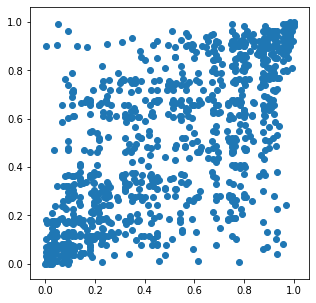